# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [2]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer%d'%(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer%d'%(i+1))(x)
    
    output_layer = keras.layers.Dense(units=output_units, activation='softmax', name='output_layer')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    return model

In [7]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [16]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session()
    optimizer = {'SGD': keras.optimizers.SGD(lr=lr, momentum=MOMENTUM, nesterov=True),
                'RMSprop': keras.optimizers.RMSprop(lr=lr),
                'Adagrad': keras.optimizers.Adagrad(lr=lr),
                'Adam': keras.optimizers.Adam(lr=lr)}
    
    for opt in optimizer.keys():
        print("Experiment with lr = %f, opt = %s" % (lr, opt))
        
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        
        model.compile(loss='categorical_crossentropy', optimizer=optimizer[opt], metrics=['accuracy'])
        
        model.fit(x_train, y_train, 
                 epochs=EPOCHS,
                 batch_size=BATCH_SIZE,
                 validation_data=(x_test, y_test),
                 shuffle=True)
        
        # Collect results
        exp_name_tag = 'lr-%s-opt-%s' % (str(lr), opt)
        results[exp_name_tag] = {'loss':    model.history.history['loss'],
                                'val_loss': model.history.history['val_loss'],
                                'acc':      model.history.history['accuracy'],
                                'val_acc':  model.history.history['val_accuracy']}

Experiment with lr = 0.100000, opt = SGD
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [

50000/50000 [==============================] - 43s 851us/step - loss: 1.4695 - accuracy: 0.4817 - val_loss: 1.6464 - val_accuracy: 0.4386
Epoch 49/50
50000/50000 [==============================] - 38s 752us/step - loss: 1.4574 - accuracy: 0.4873 - val_loss: 1.6428 - val_accuracy: 0.4292
Epoch 50/50
50000/50000 [==============================] - 36s 715us/step - loss: 1.4524 - accuracy: 0.4883 - val_loss: 1.6045 - val_accuracy: 0.4386
Experiment with lr = 0.100000, opt = RMSprop
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
______________________________________

Epoch 45/50
50000/50000 [==============================] - 39s 780us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 38s 768us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 42s 833us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 40s 805us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 37s 747us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 39s 789us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Experiment with lr = 0.100000, opt = Adagrad
Model: "model_3"
__________________________

50000/50000 [==============================] - 39s 788us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 39s 777us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 37s 731us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 36s 730us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 39s 770us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 39s 775us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 37s 731us/step - loss: 14.5063 - accuracy

Epoch 38/50
50000/50000 [==============================] - 40s 800us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 39/50
50000/50000 [==============================] - 43s 853us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 43s 863us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 41/50
50000/50000 [==============================] - 41s 828us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 42s 840us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 41s 823us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 41s 811us/step - loss: 14.506

50000/50000 [==============================] - 38s 755us/step - loss: 0.6403 - accuracy: 0.7681 - val_loss: 1.7067 - val_accuracy: 0.5216
Epoch 35/50
50000/50000 [==============================] - 39s 776us/step - loss: 0.6263 - accuracy: 0.7747 - val_loss: 1.6753 - val_accuracy: 0.5285
Epoch 36/50
50000/50000 [==============================] - 40s 790us/step - loss: 0.5910 - accuracy: 0.7887 - val_loss: 1.7881 - val_accuracy: 0.5098
Epoch 37/50
50000/50000 [==============================] - 38s 758us/step - loss: 0.5717 - accuracy: 0.7952 - val_loss: 1.7056 - val_accuracy: 0.5360
Epoch 38/50
50000/50000 [==============================] - 37s 739us/step - loss: 0.5576 - accuracy: 0.7990 - val_loss: 1.7767 - val_accuracy: 0.5244
Epoch 39/50
50000/50000 [==============================] - 37s 734us/step - loss: 0.5472 - accuracy: 0.8044 - val_loss: 1.7964 - val_accuracy: 0.5327
Epoch 40/50
50000/50000 [==============================] - 38s 760us/step - loss: 0.5158 - accuracy: 0.8157 - va

Epoch 31/50
50000/50000 [==============================] - 40s 806us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 32/50
50000/50000 [==============================] - 40s 806us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 33/50
50000/50000 [==============================] - 37s 750us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 34/50
50000/50000 [==============================] - 38s 753us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 35/50
50000/50000 [==============================] - 37s 749us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 36/50
50000/50000 [==============================] - 42s 850us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000ss: 14.5052 - accuracy: 0.1
Epoch 37/50
50000/50000 [==============================] - 40

50000/50000 [==============================] - 37s 740us/step - loss: 14.5060 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 28/50
50000/50000 [==============================] - 38s 766us/step - loss: 14.5060 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 29/50
50000/50000 [==============================] - 37s 746us/step - loss: 14.5060 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 30/50
50000/50000 [==============================] - 37s 738us/step - loss: 14.5060 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 31/50
50000/50000 [==============================] - 40s 793us/step - loss: 14.5060 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 32/50
50000/50000 [==============================] - 39s 778us/step - loss: 14.5060 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 33/50
50000/50000 [==============================] - 39s 771us/step - loss: 14.5060 - accuracy

50000/50000 [==============================] - 43s 866us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.10001s - loss: 14. - ETA:
Epoch 24/50
50000/50000 [==============================] - 43s 857us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 25/50
50000/50000 [==============================] - 40s 790us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 26/50
50000/50000 [==============================] - 40s 796us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 27/50
50000/50000 [==============================] - 41s 823us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 28/50
50000/50000 [==============================] - 41s 817us/step - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 29/50
50000/50000 [==============================] - 39s 787us/step - los

50000/50000 [==============================] - 40s 803us/step - loss: 1.2912 - accuracy: 0.5450 - val_loss: 1.3847 - val_accuracy: 0.5066
Epoch 20/50
50000/50000 [==============================] - 37s 731us/step - loss: 1.2761 - accuracy: 0.5491 - val_loss: 1.3767 - val_accuracy: 0.5090
Epoch 21/50
50000/50000 [==============================] - 39s 780us/step - loss: 1.2584 - accuracy: 0.5549 - val_loss: 1.4345 - val_accuracy: 0.4951
Epoch 22/50
50000/50000 [==============================] - 37s 731us/step - loss: 1.2455 - accuracy: 0.5606 - val_loss: 1.3664 - val_accuracy: 0.5090
Epoch 23/50
50000/50000 [==============================] - 38s 762us/step - loss: 1.2308 - accuracy: 0.5661 - val_loss: 1.3730 - val_accuracy: 0.5104
Epoch 24/50
50000/50000 [==============================] - 39s 784us/step - loss: 1.2183 - accuracy: 0.5707 - val_loss: 1.3672 - val_accuracy: 0.5121
Epoch 25/50
50000/50000 [==============================] - 38s 753us/step - loss: 1.1991 - accuracy: 0.5767 - va

50000/50000 [==============================] - 41s 821us/step - loss: 1.3276 - accuracy: 0.5267 - val_loss: 1.5833 - val_accuracy: 0.4511
Epoch 17/50
50000/50000 [==============================] - 38s 768us/step - loss: 1.3065 - accuracy: 0.5340 - val_loss: 1.5555 - val_accuracy: 0.4612
Epoch 18/50
50000/50000 [==============================] - 39s 778us/step - loss: 1.2852 - accuracy: 0.5421 - val_loss: 1.5053 - val_accuracy: 0.4669
Epoch 19/50
50000/50000 [==============================] - 38s 769us/step - loss: 1.2592 - accuracy: 0.5504 - val_loss: 1.6092 - val_accuracy: 0.4534
Epoch 20/50
50000/50000 [==============================] - 39s 790us/step - loss: 1.2427 - accuracy: 0.5546 - val_loss: 1.5260 - val_accuracy: 0.4762
Epoch 21/50
50000/50000 [==============================] - 37s 746us/step - loss: 1.2244 - accuracy: 0.5639 - val_loss: 1.5163 - val_accuracy: 0.4792
Epoch 22/50
50000/50000 [==============================] - 37s 749us/step - loss: 1.1991 - accuracy: 0.5722 - va

50000/50000 [==============================] - 39s 772us/step - loss: 1.4891 - accuracy: 0.4776 - val_loss: 1.5136 - val_accuracy: 0.4672
Epoch 14/50
50000/50000 [==============================] - 36s 729us/step - loss: 1.4764 - accuracy: 0.4828 - val_loss: 1.5156 - val_accuracy: 0.4711
Epoch 15/50
50000/50000 [==============================] - 37s 745us/step - loss: 1.4667 - accuracy: 0.4874 - val_loss: 1.5160 - val_accuracy: 0.4601
Epoch 16/50
50000/50000 [==============================] - 37s 732us/step - loss: 1.4557 - accuracy: 0.4894 - val_loss: 1.5128 - val_accuracy: 0.4657
Epoch 17/50
50000/50000 [==============================] - 37s 730us/step - loss: 1.4468 - accuracy: 0.4936 - val_loss: 1.4915 - val_accuracy: 0.4728
Epoch 18/50
50000/50000 [==============================] - 36s 729us/step - loss: 1.4373 - accuracy: 0.4977 - val_loss: 1.5053 - val_accuracy: 0.4658
Epoch 19/50
50000/50000 [==============================] - 39s 773us/step - loss: 1.4276 - accuracy: 0.4998 - va

50000/50000 [==============================] - 40s 795us/step - loss: 1.3680 - accuracy: 0.5138 - val_loss: 1.4135 - val_accuracy: 0.4966
Epoch 11/50
50000/50000 [==============================] - 42s 839us/step - loss: 1.3394 - accuracy: 0.5250 - val_loss: 1.4886 - val_accuracy: 0.4775
Epoch 12/50
50000/50000 [==============================] - 40s 802us/step - loss: 1.3094 - accuracy: 0.5327 - val_loss: 1.4536 - val_accuracy: 0.4925
Epoch 13/50
50000/50000 [==============================] - 41s 822us/step - loss: 1.3008 - accuracy: 0.5355 - val_loss: 1.3877 - val_accuracy: 0.5118
Epoch 14/50
50000/50000 [==============================] - 40s 792us/step - loss: 1.2658 - accuracy: 0.5481 - val_loss: 1.3980 - val_accuracy: 0.5047
Epoch 15/50
50000/50000 [==============================] - 40s 801us/step - loss: 1.2458 - accuracy: 0.5559 - val_loss: 1.3974 - val_accuracy: 0.5119
Epoch 16/50
50000/50000 [==============================] - 40s 792us/step - loss: 1.2288 - accuracy: 0.5641 - va

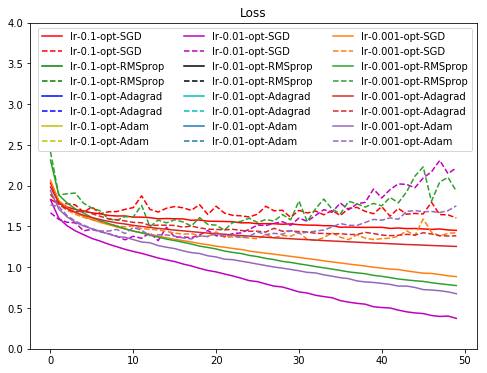

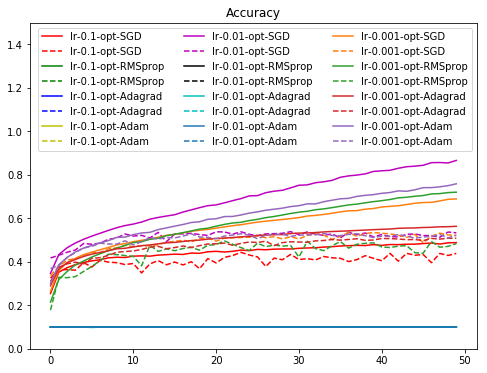

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ['r', 'g', 'b', 'y', 'm', 'k', 'c', 'C0', 'C1', 'C2', 'C3', 'C4']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['loss'])), results[cond]['loss'], '-', label=cond, color=color_bar[i]) 
    plt.plot(range(len(results[cond]['val_loss'])), results[cond]['val_loss'], '--', label=cond, color=color_bar[i])
plt.title('Loss')
plt.ylim([0,4])
plt.legend(ncol=3)
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['acc'])), results[cond]['acc'], '-', label=cond, color=color_bar[i]) 
    plt.plot(range(len(results[cond]['val_acc'])), results[cond]['val_acc'], '--', label=cond, color=color_bar[i])
plt.title('Accuracy')
plt.ylim([0,1.5])
plt.legend(ncol=3)
plt.show()